## Observations and Insights 

1. Capomulin and Ramicane have the most timepoints available with the smallest mean and median tumor size. 

2. Based on the final tumor volume visualized in the box plots, Capomulin and Ramicane appear to be more effective in reducing tumor size when compared to infubinol and ceftamin. 

3. For the Capomulin treatment, there is a reliable positive correlation between mice weight and average tumor size (r=0.83). In other words, as a mouse's weight increases, the average tumor volume also increases. The heavier the mouse, the less effective Capomulin may be in reducing tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_study_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
merged_study_df.sort_values(by=["Timepoint"],axis=0,ignore_index=True).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [3]:
# Checking the number of mice.
mice_count = merged_study_df["Mouse ID"].nunique
mice_count()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_duplicates = merged_study_df[merged_study_df.duplicated(subset=["Mouse ID", "Timepoint"])]
mice_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates = merged_study_df[merged_study_df.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)]
mice_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df=merged_study_df.drop_duplicates(subset=("Mouse ID", "Timepoint"), keep=False, ignore_index=True)
clean_mice_df.sort_values(by=["Timepoint"],axis=0,ignore_index=True).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w167,0,45.0,0,Placebo,Female,6,28
2,t718,0,45.0,0,Placebo,Female,10,30
3,o302,0,45.0,0,Placebo,Female,2,29
4,g497,0,45.0,0,Ketapril,Male,19,28


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_total = clean_mice_df["Mouse ID"].nunique
clean_mice_total()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

regimen_tumor_df = clean_mice_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.

regimen_tumor_mean = regimen_tumor_df["Tumor Volume (mm3)"].mean()
regimen_tumor_median = regimen_tumor_df["Tumor Volume (mm3)"].median()
regimen_tumor_variance = regimen_tumor_df["Tumor Volume (mm3)"].var()
regimen_tumor_stdev = regimen_tumor_df["Tumor Volume (mm3)"].std()
regimen_tumor_sem = regimen_tumor_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

regimen_tumor_summary_df = pd.DataFrame({"Mean": regimen_tumor_mean, "Median": regimen_tumor_median, "Variance": regimen_tumor_variance, "Standard Deviation": regimen_tumor_stdev, "SEM": regimen_tumor_sem})
regimen_tumor_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Using the aggregation method, produce the same summary statistics in a single line

regimen_tumor_summary_df.agg(func=dict,axis="columns")
regimen_tumor_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

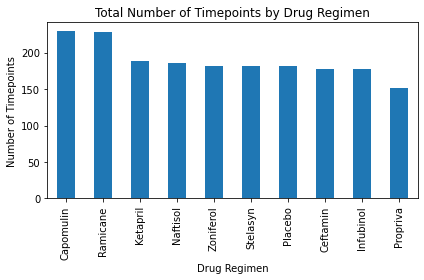

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_pandas=clean_mice_df["Drug Regimen"].value_counts()
timepoints_pandas.plot(kind="bar", title="Total Number of Timepoints by Drug Regimen", ylabel = "Number of Timepoints", xlabel = "Drug Regimen")

plt.tight_layout()
plt.show()

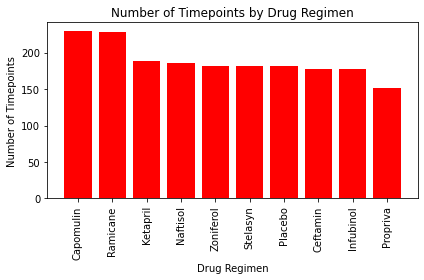

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints=clean_mice_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(timepoints))

plt.bar(x_axis, timepoints, color="r", align="center")

# Reformat x-axis ticks to include drug names
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints.index.values, rotation="vertical")

# Format graph labels and titles
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints by Drug Regimen")

plt.tight_layout()
plt.show()

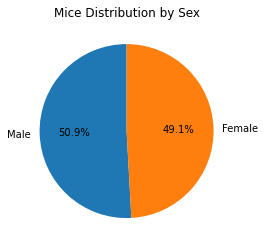

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_mice_df["Sex"].value_counts()

# Pie chart formatting
sex_data_pandas_plot = sex_data.plot.pie(autopct="%1.1f%%", startangle=90, title = "Mice Distribution by Sex")
sex_data_pandas_plot.set_ylabel("")

plt.show()

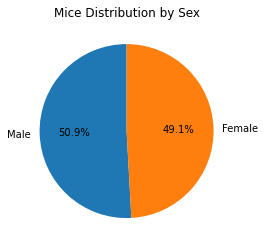

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_data, labels=sex_data.index.values, autopct = "%1.1f%%", startangle=90)

plt.title("Mice Distribution by Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = pd.DataFrame(clean_mice_df.groupby("Mouse ID")["Timepoint"].max().reset_index()).rename(columns={"Timepoint": "Max_Timepoint"})
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_timepoint_df=pd.merge(clean_mice_df, max_timepoint_df, on="Mouse ID")
merged_timepoint_df.sort_values(by=["Timepoint"],axis=0,ignore_index=True).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max_Timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,45
1,w167,0,45.0,0,Placebo,Female,6,28,35
2,t718,0,45.0,0,Placebo,Female,10,30,45
3,o302,0,45.0,0,Placebo,Female,2,29,30
4,g497,0,45.0,0,Ketapril,Male,19,28,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume=[]

# Loop through original dataframe to find specific treatments listed agove

for drug in drugs:
    tumor_df = merged_timepoint_df.loc[merged_timepoint_df["Drug Regimen"] == drug]
    
# Create dataframe subset to target max timepoint for each treatment

    tumor_volume_df = tumor_df.loc[tumor_df["Timepoint"] == tumor_df["Max_Timepoint"]]
    
# Create series of final volume values for each treatment
    
    volume_values = tumor_volume_df["Tumor Volume (mm3)"]
    tumor_volume.append(volume_values)

# Calculate the IQR 

    quartiles = volume_values.quantile([.25,.5,.75])
    lower= quartiles[0.25]
    upper=quartiles[0.75]
    iqr=upper-lower
    print(f"IQR for {drug} is {iqr}")
    
    lower_bounds = lower - (1.5*iqr)
    upper_bounds = upper + (1.5*iqr)
    print(f"The lower bound for {drug} is {lower_bounds}")
    print(f"The upper bound for {drug} is {upper_bounds}")
    
# Quantitatively determine if there are any potential outliers
    
    outliers = volume_values.loc[(tumor_volume_df["Tumor Volume (mm3)"] < lower_bounds) | (tumor_volume_df["Tumor Volume (mm3)"] > upper_bounds)].count()
    print(f"{drug} has {outliers} outlier(s)")
    

IQR for Capomulin is 7.781863460000004
The lower bound for Capomulin is 20.70456164999999
The upper bound for Capomulin is 51.83201549
Capomulin has 0 outlier(s)
IQR for Ramicane is 9.098536719999998
The lower bound for Ramicane is 17.912664470000003
The upper bound for Ramicane is 54.30681135
Ramicane has 0 outlier(s)
IQR for Infubinol is 11.477135160000003
The lower bound for Infubinol is 36.83290494999999
The upper bound for Infubinol is 82.74144559000001
Infubinol has 1 outlier(s)
IQR for Ceftamin is 15.577752179999997
The lower bound for Ceftamin is 25.355449580000002
The upper bound for Ceftamin is 87.66645829999999
Ceftamin has 0 outlier(s)


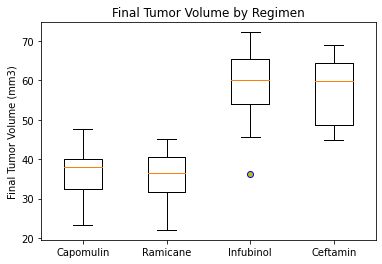

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Format outlier(s)
outlier_format = dict(marker="o", markerfacecolor = "y", markeredgecolor="b")

# Create boxplot
plt.boxplot(tumor_volume, flierprops=outlier_format)

# Update formatting
plt.title("Final Tumor Volume by Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()


## Line and Scatter Plots

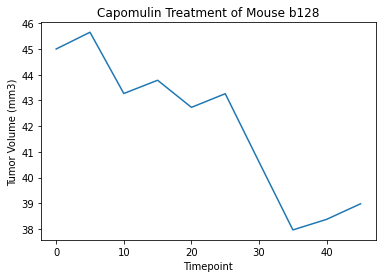

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify mouse treated with Capomulin (taken from data tables above)
capomulin_mouse = clean_mice_df[clean_mice_df["Mouse ID"] == "b128"]

# Plot a line chart with timepoint values on the x-axis and tumor volume on the y-axis
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])

# Format chart to include labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

plt.show()

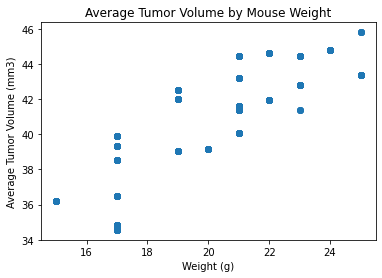

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Identify mice that were given the Capomulin regimen

capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]

# Solve for each mouse's average tumor volume and merge tumor volume into clean_mice_df

avg_vol_capomulin_df=pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

avg_vol_capomulin_df=pd.merge(capomulin_df, avg_vol_capomulin_df, on="Mouse ID")
final_avg_vol_capomulin_df = avg_vol_capomulin_df[["Weight (g)", "Average Tumor Volume (mm3)"]]

# Set x and y values to create scatter plot with line

x_values = final_avg_vol_capomulin_df["Weight (g)"]
y_values = final_avg_vol_capomulin_df["Average Tumor Volume (mm3)"]

plt.scatter(x_values,y_values)

# Format scatter plot with labels and titles

plt.title("Average Tumor Volume by Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume in the Capomulin regimen is 0.83


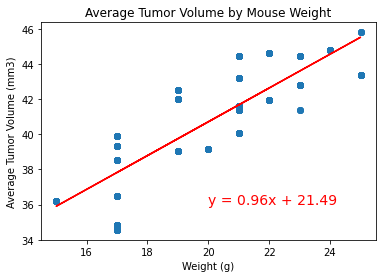

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Solve for the Pearson correlation coefficient between mouse weight and tumor volume for the Capomulin regimen
mouse_weight = final_avg_vol_capomulin_df.iloc[:,0]
tumor_volume = final_avg_vol_capomulin_df.iloc[:,1]
correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between mouse weight and average tumor volume in the Capomulin regimen is {round(correlation[0],2)}")

# Create scatter plot with title and labels
plt.scatter(mouse_weight, tumor_volume)
plt.title("Average Tumor Volume by Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate and plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_volume)
regress=mouse_weight * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mouse_weight,regress,"r-")
plt.annotate(line,(20,36),fontsize=14,color="r")

plt.show()